# Classification de l'angle et du freinage 

Après avoir preprocessé les données nous procédons au traitement grace à un modèle basé sur 5conv + 5Denses +angleout +freinageout

##  Importation des biblothèques

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import numpy as np 
#import keras
from sklearn.model_selection import train_test_split
from fonctionsUtiles import architecture
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import time
import keras
from fonctionsUtiles import functions as f
from fonctionsUtiles import error

In [4]:
#Les arguments pour le modèle DL
args = {"batch_size": 30,
       "epochs": 50,
       "val_split":0.2,
       "early_stop":False,
       "patience":6,
       'number_of_classes':5}

## Importation des donnèes 

In [5]:
#Donnée collécté du couloir
X_1 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_0.npy')
X_2 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_1.npy')   
X_3 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_2.npy')   
X_4 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_3.npy')    


#Données simmulées
X_simulator = np.load("../Datasets/Simulation/X_simulator.npy")   
#Données du couloir colléctées avant
X_couloir_1 = np.load('../Datasets/Old dataset/Really old/X_couloir_lumineux.npy')
X_couloir_2 = np.load('../Datasets/Old dataset/Really old/X_couloir_lumineux2.npy')
X_couloir_3 = np.load('../Datasets/Old dataset/Really old/X_couloir_lumineux3.npy')
#Donnée du Parking
X_parking = np.load('../Datasets/Old dataset/Really old/X_parking.npy')
#Donnée d'Axionaut (peuvent servir après)
#X_axionaut = np.load('../Datasets/Axionaut/X_train_axio.npy')


#Donnée collécté du couloir
Y_angle_1 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_0.npy')
Y_angle_2 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_1.npy')
Y_angle_3 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_2.npy')
Y_angle_4 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_3.npy')
#Données simmulées
Y_angle_simulator = np.load('../Datasets/Simulation/Y_simulator.npy')
#Données du couloir colléctées avant
Y_angle_couloir_1 = np.load('../Datasets/Old dataset/Really old/Y_couloir_lumineux.npy')
Y_angle_couloir_2 = np.load('../Datasets/Old dataset/Really old/Y_couloir_lumineux2.npy')
Y_angle_couloir_3 = np.load('../Datasets/Old dataset/Really old/Y_couloir_lumineux3.npy')
#Donnée du Parking
Y_angle_parking = np.load('../Datasets/Old dataset/Really old/Y_parking.npy')
#Donnée d'Axionaut (peuvent servir après)
#Y_angle_axionaut = np.load('../Datasets/Axionaut/Y_train_axio.npy')

Y_speed_1 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_0.npy')
Y_speed_2 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_1.npy')
Y_speed_3 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_2.npy')
Y_speed_4 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_3.npy')


In [6]:
"""#Donnée raffinée collécté du couloir
X_1 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_NewNew_0.npy')
X_2 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_NewNew_1.npy')   
X_3 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_NewNew_2.npy')   
X_4 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_NewNew_3.npy') 

Y_angle_1 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_NewNew_0.npy')
Y_angle_2 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_NewNew_1.npy')
Y_angle_3 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_NewNew_2.npy')
Y_angle_4 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_NewNew_3.npy')

Y_speed_1 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_NewNew_0.npy')
Y_speed_2 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_NewNew_1.npy')
Y_speed_3 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_NewNew_2.npy')
Y_speed_4 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_NewNew_3.npy')
"""


## Preprocessing the data

In [6]:
#On ne prend qu'une partie des données simmulé pour éviter d'en avoir trop chose qui biaisera notre modèle.
X_simulator = X_simulator[:30000]
Y_simulator = Y_angle_simulator[:30000]

(array([ 267., 1609., 3467., 4673., 5224., 5034., 4561., 3379., 1584.,
         202.]), array([  1.06092863,  18.79515339,  36.52937815,  54.2636029 ,
         71.99782766,  89.73205242, 107.46627718, 125.20050194,
        142.93472669, 160.66895145, 178.40317621]), <a list of 10 Patch objects>)

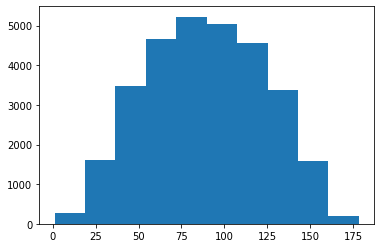

In [7]:
#Distribution des angles dans les données simmulées
plt.hist(Y_simulator)

In [8]:
#On discrétise pour freinage et non freinage
#On considère que les vitesses inférieures à 5 sont des freinages
#Pour la première séquence
Y_acc_1 = np.zeros(Y_speed_1.shape[0])

for i in range (Y_speed_1.shape[0]):
    if Y_speed_1[i]<5:
        Y_acc_1[i] = 1
        
#Pour la deuxième séquence
Y_acc_2 = np.zeros(Y_speed_2.shape[0])

for i in range (Y_speed_2.shape[0]):
    if Y_speed_2[i]<5:
        Y_acc_2[i] = 1 

#Pour la toisième séquence
Y_acc_3 = np.zeros(Y_speed_3.shape[0])

for i in range (Y_speed_3.shape[0]):
    if Y_speed_3[i]<5:
        Y_acc_3[i] = 1

#Pour la quatriière séquence
Y_acc_4 = np.zeros(Y_speed_4.shape[0])

for i in range (Y_speed_4.shape[0]):
    if Y_speed_4[i]<5:
        Y_acc_4[i] = 1

# Etapes des angles

In [7]:
#On concatenne les différents set de donnée
X = np.concatenate([X_1 , X_2 , X_3 ,X_4 , X_simulator, X_couloir_1, X_couloir_2 , X_couloir_3, X_parking])
Y_angle = np.concatenate([Y_angle_1 , Y_angle_2, Y_angle_3 , Y_angle_4 , Y_simulator, Y_angle_couloir_1, Y_angle_couloir_2, Y_angle_couloir_3, Y_angle_parking])

In [8]:
#Pour les données de freinage on enlève les 270 degrès et on la remplace par 90
Y_angle[list(np.where(Y_angle == 270)[0])] = 90

In [9]:
#On enlève les données où on a marche arrière
truncate = list(np.where(Y_angle>180)[0])

X_angle = np.delete(X , truncate , axis = 0)
Y_angle = np.delete(Y_angle , truncate , axis = 0)

In [10]:
print('The final shape of the training set is' , X_angle.shape )

The final shape of the training set is (48654, 90, 250, 3)


In [11]:
#Transform the problem of angles to a classification problem


#Pour 5 classes

Y_angle[list(np.where(Y_angle<=35))] = 0  #extrème droite
Y_angle[list(np.where((Y_angle>35) & (Y_angle<=75)))] = 1   #droite
Y_angle[list(np.where((Y_angle>75) & (Y_angle<=110)))] = 2   #Tout droit
Y_angle[list(np.where((Y_angle>110) & (Y_angle<=145)))] = 3    #gauche
Y_angle[list(np.where((Y_angle>145) & (Y_angle<=180)))] = 4      #extrème gauche

"""
#Pour 7 classes
Y_angle[list(np.where(Y_angle<=25))] = 0  #extrème droite
Y_angle[list(np.where((Y_angle>25) & (Y_angle<=50)))] = 1 #droite
Y_angle[list(np.where((Y_angle>50) & (Y_angle<=75)))] = 2  #petite droite
Y_angle[list(np.where((Y_angle>75) & (Y_angle<=105)))] = 3   #Tout droit
Y_angle[list(np.where((Y_angle>105) & (Y_angle<=130)))] = 4    #petite gauche
Y_angle[list(np.where((Y_angle>130) & (Y_angle<=155)))] = 5    #gauche
Y_angle[list(np.where((Y_angle>155) & (Y_angle<=180)))] = 6      #extrème gauche
"""

'\n#Pour 7 classes\nY_angle[list(np.where(Y_angle<=25))] = 0  #extrème droite\nY_angle[list(np.where((Y_angle>25) & (Y_angle<=50)))] = 1 #droite\nY_angle[list(np.where((Y_angle>50) & (Y_angle<=75)))] = 2  #petite droite\nY_angle[list(np.where((Y_angle>75) & (Y_angle<=105)))] = 3   #Tout droit\nY_angle[list(np.where((Y_angle>105) & (Y_angle<=130)))] = 4    #petite gauche\nY_angle[list(np.where((Y_angle>130) & (Y_angle<=155)))] = 5    #gauche\nY_angle[list(np.where((Y_angle>155) & (Y_angle<=180)))] = 6      #extrème gauche\n'

In [ ]:
#Distribution des angles
plt.hist(Y_angle)

In [12]:
#Train test split
X_train , X_test, Y_train , Y_test = train_test_split(X_angle , Y_angle , test_size = 0.2)

In [13]:
#Train val split
X_train , X_val , Y_train , Y_val = train_test_split(X_train , Y_train , test_size = 0.2)

In [14]:
#Avoir une dummie_variable

Y_train_output = np.zeros((Y_train.shape[0] ,args['number_of_classes'] ))
Y_val_output = np.zeros((Y_val.shape[0] , args['number_of_classes']))
Y_test_output = np.zeros((Y_test.shape[0] , args['number_of_classes']))

for i in range(Y_train.shape[0]):
    n = int(Y_train[i])
    Y_train_output[i , n] = 1

for i in range (Y_val.shape[0]):
    n = int(Y_val[i])
    Y_val_output[i , n] = 1
    
for i in range(Y_test.shape[0]):
    n = int(Y_test[i])
    Y_test_output[i , n] = 1


In [ ]:
print('Number of points in the training set' , Y_train.shape[0])
print('Number of points in the validation set' , Y_val.shape[0])
print('Number of points in the test set' , Y_test.shape[0])

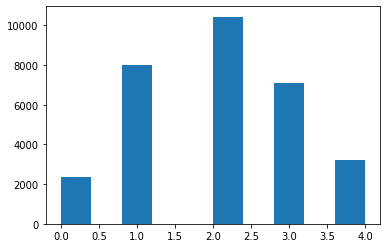

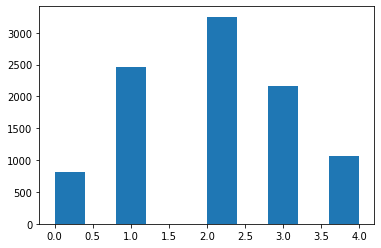

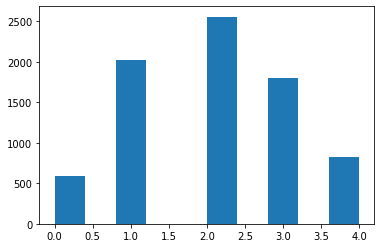

In [15]:
#Stats sur les données
plt.hist(Y_train)
plt.show()

plt.hist(Y_test)
plt.show()

plt.hist(Y_val)
plt.show()

### Model

In [16]:
model_path = '../Models/test 14_08_19/classification_angle_with_no_coulomb'
# Create autopilot model from architectures and print summary
model =  architecture.model_categorical(input_size= (90,250,3))
model.summary()

W0823 10:49:18.354369 140482233395008 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 10:49:18.373118 140482233395008 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 10:49:18.374658 140482233395008 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 10:49:18.401961 140482233395008 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_1 (Batch (None, 43, 123, 24)       96        
_________________________________________________________________
activation_1 (Activation)    (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 60, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 60, 32)        0         
__________

In [18]:
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,Y_train_output,
                nb_epoch=args['epochs'], 
                validation_data=(X_val, Y_val_output),
                callbacks = callbacks_list,
                batch_size = 64,
                )

W0823 10:49:46.734536 140482233395008 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 31138 samples, validate on 7785 samples
Epoch 1/50
31138/31138 [==============================] - 21s 673us/step - loss: 1.0109 - acc: 0.5873 - val_loss: 1.0134 - val_acc: 0.6329

Epoch 00001: val_loss improved from inf to 1.01344, saving model to ../Models/test 14_08_19/classification_angle_with_no_coulomb.hdf5
Epoch 2/50
31138/31138 [==============================] - 23s 752us/step - loss: 0.6821 - acc: 0.7238 - val_loss: 0.6881 - val_acc: 0.7358

Epoch 00002: val_loss improved from 1.01344 to 0.68814, saving model to ../Models/test 14_08_19/classification_angle_with_no_coulomb.hdf5
Epoch 3/50
31138/31138 [==============================] - 24s 762us/step - loss: 0.5179 - acc: 0.7886 - val_loss: 0.5022 - val_acc: 0.8058

Epoch 00003: val_loss improved from 0.68814 to 0.50219, saving model to ../Models/test 14_08_19/classification_angle_with_no_coulomb.hdf5
Epoch 4/50
31138/31138 [==============================] - 24s 757us/step - loss: 0.4229 - acc: 0.8302 - val_loss: 0.8729 

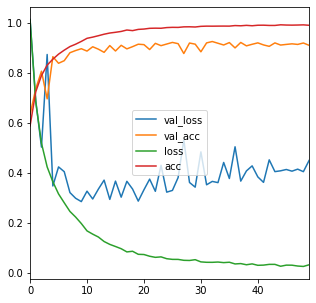

In [19]:
import pandas as pd

historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf.plot(figsize = (5 , 5))

In [1]:
#We import the model 
from keras.models import load_model
model = load_model('../Models/test 14_08_19/classification_angle_with_no_coulomb.hdf5')

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

OSError: Unable to open file (unable to open file: name = '../Models/test 14_08_19/classification_angle_with_no_coulomb.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

###  Test the model

In [21]:
#We make the prediction
Y_predicted = model.predict(X_test)

In [22]:
#We transform the prediction from probability to a class
Y_pred = np.zeros(Y_predicted.shape[0])
for i in range(Y_predicted.shape[0]):
    Y_pred[i] =np.argmax(Y_predicted[i]) 

In [29]:
from sklearn.metrics import classification_report

Report = classification_report(Y_test , Y_pred)

In [30]:
#Report with 30000 data simulated and the old data without coulomb
print(Report)

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       807
         1.0       0.93      0.87      0.90      2454
         2.0       0.86      0.92      0.89      3251
         3.0       0.91      0.85      0.88      2156
         4.0       0.86      0.91      0.88      1063

    accuracy                           0.89      9731
   macro avg       0.88      0.88      0.88      9731
weighted avg       0.89      0.89      0.89      9731



## Freinage

### Preprocess the data

In [12]:
#Concatenate all the data that we have the speed associated
X_speed = np.concatenate([X_1 , X_2 , X_3 , X_4]) 
Y_acc =np.concatenate([Y_acc_1 , Y_acc_2 ,  Y_acc_3 , Y_acc_4])
Y_angle = np.concatenate([Y_angle_1 , Y_angle_2 , Y_angle_3 , Y_angle_4])

In [13]:
#Pour les données de freinage
Y_angle[list(np.where(Y_angle == 270)[0])] = 90

In [14]:
#Enlever les angles correspondant à des marches arrières
truncate = list(np.where(Y_angle>180)[0])

X_speed = np.delete(X_speed , truncate , axis = 0)
Y_angle = np.delete(Y_angle , truncate , axis = 0)
Y_acc = np.delete(Y_acc, truncate , axis = 0)

In [15]:
#Transform the problem of angles to a classification problem
#Pour 5 classes
if args['number_of_classes']:
    #Pour 5 classes
    Y_angle[list(np.where(Y_angle<=35))] = 0
    Y_angle[list(np.where((Y_angle>35) & (Y_angle<=75)))] = 1
    Y_angle[list(np.where((Y_angle>75) & (Y_angle<=110)))] = 2
    Y_angle[list(np.where((Y_angle>110) & (Y_angle<=145)))] = 3
    Y_angle[list(np.where((Y_angle>145) & (Y_angle<=180)))] = 4
    
else:
    #Pour 7 classes
    Y_angle[list(np.where(Y_angle<=25))] = 0  #extrème droite
    Y_angle[list(np.where((Y_angle>25) & (Y_angle<=50)))] = 1 #droite
    Y_angle[list(np.where((Y_angle>50) & (Y_angle<=75)))] = 2  #petite droite
    Y_angle[list(np.where((Y_angle>75) & (Y_angle<=105)))] = 3   #Tout droit
    Y_angle[list(np.where((Y_angle>105) & (Y_angle<=130)))] = 4    #petite gauche
    Y_angle[list(np.where((Y_angle>130) & (Y_angle<=155)))] = 5    #gauche
    Y_angle[list(np.where((Y_angle>155) & (Y_angle<=180)))] = 6      #extrème gauche


(array([5541.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         759.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

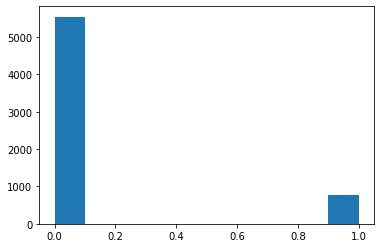

In [16]:
plt.hist(Y_acc)

(array([ 379.,    0., 1088.,    0.,    0., 2381.,    0., 1412.,    0.,
        1040.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

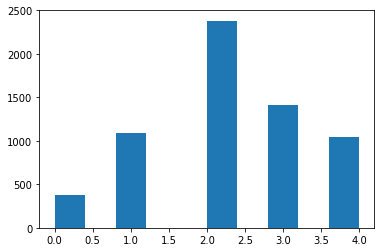

In [17]:
plt.hist(Y_angle)

In [18]:
print('The shape of our data is' , X_speed.shape)

The shape of our data is (6300, 90, 250, 3)


In [19]:
#Playing with the targets to do the train_test split
Y_speed = np.concatenate([np.array([Y_acc]) , np.array([Y_angle])] , axis = 0)
Y_speed = Y_speed.T

In [20]:
#train-test split
X_train , X_test , Y_train , Y_test = train_test_split(X_speed , Y_speed , test_size = 0.2 , stratify = Y_angle)

In [21]:
#train-val split
X_train , X_val , Y_train , Y_val = train_test_split(X_train , Y_train , test_size = 0.2 , stratify = Y_train[: , 0])

In [22]:
Y_acc_train = Y_train[: , 0]
Y_angle_train = Y_train[: , 1]

Y_acc_val = Y_val[: , 0]
Y_angle_val = Y_val[: , 1]

Y_acc_test = Y_test[: , 0]
Y_angle_test = Y_test[: , 1]

In [23]:
#Get dummie vector
Y_angle_train_output = np.zeros((Y_angle_train.shape[0] , args['number_of_classes']))
Y_angle_val_output = np.zeros((Y_angle_val.shape[0] , args['number_of_classes']))
Y_angle_test_output = np.zeros((Y_angle_test.shape[0] , args['number_of_classes']))

for i in range(Y_angle_train.shape[0]):
    n = int(Y_angle_train[i])
    Y_angle_train_output[i , n] = 1

for i in range (Y_angle_val.shape[0]):
    n = int(Y_angle_val[i])
    Y_angle_val_output[i , n] = 1
    
for i in range(Y_angle_test.shape[0]):
    n = int(Y_angle_test[i])
    Y_angle_test_output[i , n] = 1

### Transfer learning

In [11]:
#Import the base Model
from keras.models import load_model
base_model = load_model('../Models/classification_angle_with_no_coulomb.hdf5')

W0826 16:09:43.536093 140400314828608 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 16:09:43.558382 140400314828608 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0826 16:09:43.584407 140400314828608 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 16:09:43.585012 140400314828608 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Pleas

In [12]:
base_model.layers.pop() #enlever la Dense pour l'angle
base_model.layers.pop() #Pour la dropout_16
base_model.layers.pop() #Pour la dense 16

In [13]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_1 (Batch (None, 43, 123, 24)       96        
_________________________________________________________________
activation_1 (Activation)    (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 60, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 60, 32)        0         
__________

In [14]:
 
def transform_model(base_model ,dropout = 0.1 , number_of_classes = 5):
    """
    Inputs:
        -base_model : A Keras Model
        dropout ; the dropou rate
        number_of_classes : The number of classes fro the angle
    Output:
        -A Keras Model
    """
    from keras.layers import Dense , BatchNormalization , Activation ,  Dropout
    from keras.models import Model

    x = base_model.layers[-1].output

    y = Dense(100 , use_bias = False , name = 'Dense_1')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    y = Dense(50 , use_bias = False , name = 'Dense_2')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    speed_out = Dense(1 , activation = 'sigmoid' , name = 'speed_out')(y)
    #---------------------------------------------------------------------------
    z = Dense(100 , use_bias = False , name = 'Dense_3')(x)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)

    z = Dense(50 , use_bias = False , name = 'Dense_4')(z)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)


    angle_out2 = Dense(number_of_classes, activation='softmax', name='angle_out')(z)  
    #-----------------------------------------------------------------
    model = Model(input=base_model.input , output=[angle_out2 , speed_out])

    model.compile(optimizer='adam',

                  loss={'angle_out':'categorical_crossentropy' , 
                        'speed_out' : 'binary_crossentropy'},

                  metrics={'angle_out' : 'accuracy',
                           'speed_out' : 'accuracy'}
                 )
    return model

In [17]:
model = transform_model(base_model , 0.5 , 5)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 90, 250, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 43, 123, 24)  1824        img_in[0][0]                     
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 43, 123, 24)  96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 43, 123, 24)  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [30]:
#Calculating the ratio n_ones/n_data_points to fit the Model
n_ones = np.where(Y_acc_train == 1)[0].shape[0]
n_zeros = np.where(Y_acc_train == 0)[0].shape[0]
print(n_ones/(n_ones+n_zeros))

0.12177579365079365


In [31]:
print('The number of points in the training set' , Y_angle_train.shape[0])
print('The number of points in the validation set' , Y_angle_val.shape[0])
print('The number of points in the test set' , Y_angle_test.shape[0])


The number of points in the training set 4032
The number of points in the validation set 1008
The number of points in the test set 1260


In [54]:
model_path = '../Models/test 14_08_19/classification_angle_speed_with_Axionaut_data'
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_speed_out_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,[Y_angle_train_output , Y_acc_train],
                nb_epoch=args['epochs'], 
                validation_data=(X_val, [Y_angle_val_output , Y_acc_val]),
                callbacks = callbacks_list,
                batch_size = 64,
                class_weight= {'speed_out' : {0: 0.12, 1: 0.88}} 
                )

Train on 4032 samples, validate on 1008 samples
Epoch 1/50
4032/4032 [==============================] - 5s 1ms/step - loss: 1.5607 - angle_out_loss: 1.4331 - speed_out_loss: 0.1276 - angle_out_acc: 0.4281 - speed_out_acc: 0.6076 - val_loss: 1.3295 - val_angle_out_loss: 0.8719 - val_speed_out_loss: 0.4577 - val_angle_out_acc: 0.6964 - val_speed_out_acc: 0.8115

Epoch 00001: val_speed_out_loss improved from inf to 0.45767, saving model to ../Models/test 14_08_19/classification_angle_speed_with_Axionaut_data.hdf5
Epoch 2/50
4032/4032 [==============================] - 3s 828us/step - loss: 0.9903 - angle_out_loss: 0.9020 - speed_out_loss: 0.0883 - angle_out_acc: 0.6538 - speed_out_acc: 0.7656 - val_loss: 1.2765 - val_angle_out_loss: 0.7910 - val_speed_out_loss: 0.4856 - val_angle_out_acc: 0.7083 - val_speed_out_acc: 0.7946

Epoch 00002: val_speed_out_loss did not improve from 0.45767
Epoch 3/50
4032/4032 [==============================] - 3s 769us/step - loss: 0.7738 - angle_out_loss: 0.7


Epoch 00020: val_speed_out_loss did not improve from 0.08424
Epoch 21/50
4032/4032 [==============================] - 3s 842us/step - loss: 0.0898 - angle_out_loss: 0.0817 - speed_out_loss: 0.0082 - angle_out_acc: 0.9757 - speed_out_acc: 0.9849 - val_loss: 0.6024 - val_angle_out_loss: 0.4889 - val_speed_out_loss: 0.1135 - val_angle_out_acc: 0.8839 - val_speed_out_acc: 0.9653

Epoch 00021: val_speed_out_loss did not improve from 0.08424
Epoch 22/50
4032/4032 [==============================] - 3s 821us/step - loss: 0.0825 - angle_out_loss: 0.0742 - speed_out_loss: 0.0084 - angle_out_acc: 0.9819 - speed_out_acc: 0.9844 - val_loss: 0.5000 - val_angle_out_loss: 0.4285 - val_speed_out_loss: 0.0716 - val_angle_out_acc: 0.9028 - val_speed_out_acc: 0.9792

Epoch 00022: val_speed_out_loss improved from 0.08424 to 0.07157, saving model to ../Models/test 14_08_19/classification_angle_speed_with_Axionaut_data.hdf5
Epoch 23/50
4032/4032 [==============================] - 3s 826us/step - loss: 0.070

In [33]:
#For the data raffinée
model_path = '../Models/classification_angle_speed_with_data_raffine'
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_speed_out_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,[Y_angle_train_output , Y_acc_train],
                nb_epoch=args['epochs'], 
                validation_data=(X_val, [Y_angle_val_output , Y_acc_val]),
                callbacks = callbacks_list,
                batch_size = 64,
                class_weight= {'speed_out' : {0: 0.12, 1: 0.88}} 
                )

Train on 4032 samples, validate on 1008 samples
Epoch 1/50
4032/4032 [==============================] - 3s 657us/step - loss: 0.9022 - angle_out_loss: 0.8091 - speed_out_loss: 0.0931 - angle_out_acc: 0.7076 - speed_out_acc: 0.7202 - val_loss: 1.3362 - val_angle_out_loss: 0.7410 - val_speed_out_loss: 0.5952 - val_angle_out_acc: 0.7421 - val_speed_out_acc: 0.6806

Epoch 00001: val_speed_out_loss improved from inf to 0.59520, saving model to ../Models/classification_angle_speed_with_data_raffine.hdf5
Epoch 2/50
4032/4032 [==============================] - 2s 618us/step - loss: 0.7138 - angle_out_loss: 0.6360 - speed_out_loss: 0.0778 - angle_out_acc: 0.7753 - speed_out_acc: 0.8127 - val_loss: 1.3239 - val_angle_out_loss: 0.5475 - val_speed_out_loss: 0.7764 - val_angle_out_acc: 0.8165 - val_speed_out_acc: 0.6389

Epoch 00002: val_speed_out_loss did not improve from 0.59520
Epoch 3/50
4032/4032 [==============================] - 3s 657us/step - loss: 0.6033 - angle_out_loss: 0.5419 - speed_o

4032/4032 [==============================] - 3s 666us/step - loss: 0.0622 - angle_out_loss: 0.0577 - speed_out_loss: 0.0046 - angle_out_acc: 0.9881 - speed_out_acc: 0.9936 - val_loss: 0.5453 - val_angle_out_loss: 0.4632 - val_speed_out_loss: 0.0821 - val_angle_out_acc: 0.8938 - val_speed_out_acc: 0.9742

Epoch 00042: val_speed_out_loss did not improve from 0.02758
Epoch 43/50
4032/4032 [==============================] - 3s 637us/step - loss: 0.0465 - angle_out_loss: 0.0426 - speed_out_loss: 0.0039 - angle_out_acc: 0.9906 - speed_out_acc: 0.9945 - val_loss: 0.5778 - val_angle_out_loss: 0.5273 - val_speed_out_loss: 0.0506 - val_angle_out_acc: 0.9028 - val_speed_out_acc: 0.9881

Epoch 00043: val_speed_out_loss did not improve from 0.02758
Epoch 44/50
4032/4032 [==============================] - 3s 646us/step - loss: 0.0405 - angle_out_loss: 0.0347 - speed_out_loss: 0.0058 - angle_out_acc: 0.9913 - speed_out_acc: 0.9908 - val_loss: 0.6360 - val_angle_out_loss: 0.5559 - val_speed_out_loss: 

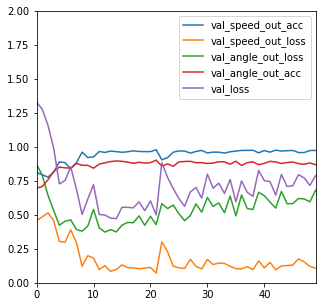

In [55]:
import pandas as pd

historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf[['val_speed_out_acc' , 'val_speed_out_loss' , 'val_angle_out_loss' , 'val_angle_out_acc' , 'val_loss']].plot( figsize = (5 , 5) )
plt.ylim(0 , 2)
plt.show()

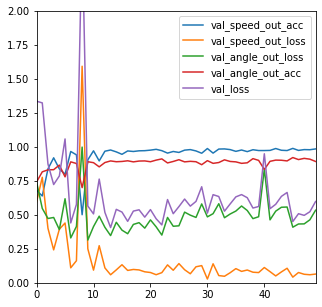

In [35]:
#Pour la data raffinée
import pandas as pd

historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf[['val_speed_out_acc' , 'val_speed_out_loss' , 'val_angle_out_loss' , 'val_angle_out_acc' , 'val_loss']].plot( figsize = (5 , 5) )
plt.ylim(0 , 2)
plt.show()

In [10]:
#keeping the best model
from keras.models import load_model
model = load_model('../Models/classification_angle_speed_with_no_coulomb.hdf5')

W0828 10:01:16.295532 140248819636032 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 10:01:16.318190 140248819636032 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 10:01:16.344640 140248819636032 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 10:01:16.345656 140248819636032 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Pleas

## Test the model

In [24]:
Y_predicted = model.predict(X_test)

In [30]:
#Transform from probability to a class
Y_pred_angle = np.zeros(Y_predicted[0].shape[0])
for i in range(Y_predicted[0].shape[0]):
    Y_pred_angle[i] =np.argmax(Y_predicted[0][i]) 

In [31]:
# Tronsforming the probability to a class
Y_pred_speed = np.zeros(Y_predicted[1].shape[0])
for i in range(Y_predicted[1].shape[0]):
    if Y_predicted[1][i]>0.5:
        Y_pred_speed[i] = 1

In [32]:
from sklearn.metrics import classification_report

Report_angle = classification_report(Y_angle_test , Y_pred_angle)
Report_speed = classification_report(Y_acc_test , Y_pred_speed)

In [33]:
print(Report_speed)

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1121
         1.0       0.95      0.98      0.96       139

    accuracy                           0.99      1260
   macro avg       0.97      0.99      0.98      1260
weighted avg       0.99      0.99      0.99      1260



In [42]:
#Report with the data raffine
print(Report_angle)

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89        83
         1.0       0.94      0.84      0.89       206
         2.0       0.92      0.95      0.93       602
         3.0       0.89      0.75      0.81       166
         4.0       0.88      0.97      0.92       203

    accuracy                           0.91      1260
   macro avg       0.90      0.88      0.89      1260
weighted avg       0.91      0.91      0.90      1260



In [43]:
#Report with the data raffine
print(Report_speed)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1113
         1.0       0.94      0.89      0.92       147

    accuracy                           0.98      1260
   macro avg       0.96      0.94      0.95      1260
weighted avg       0.98      0.98      0.98      1260



In [62]:
#Report with 30000 data simulated and the old data no coulomb
print(Report_angle)

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91        76
         1.0       0.90      0.90      0.90       218
         2.0       0.93      0.93      0.93       476
         3.0       0.90      0.86      0.88       282
         4.0       0.95      0.95      0.95       208

    accuracy                           0.92      1260
   macro avg       0.91      0.92      0.91      1260
weighted avg       0.92      0.92      0.92      1260



In [64]:
#Report with 30000 data simulated and the old data no coulomb
print(Report_speed)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1118
         1.0       0.86      0.94      0.90       142

    accuracy                           0.98      1260
   macro avg       0.93      0.96      0.94      1260
weighted avg       0.98      0.98      0.98      1260



# Test of the old stats

In [25]:
number_of_zeros = 0
number_of_ones = 0

for i in range (Y_acc_test.shape[0]):
    if Y_acc_test[i]==0:
        number_of_zeros += 1
    elif Y_acc_test[i] == 1:
        number_of_ones += 1
    else:
        print('What!!!!!')

print(number_of_zeros)
print(number_of_ones)

1121
139


In [26]:
#True Positive rate
true_positive = 0

for i in range (Y_predicted[1].shape[0]):
    if Y_predicted[1][i]>0.5:
        if Y_acc_test[i] == 1:
            true_positive += 1

print((true_positive/number_of_ones)*100)

97.84172661870504


In [27]:
#False Positive rate:
false_positive = 0

for i in range (Y_predicted[1].shape[0]):
    if Y_predicted[1][i]>0.5:
        if Y_acc_test[i] == 0:
            false_positive += 1

print((false_positive/number_of_zeros)*100)

0.6244424620874219


In [28]:
#True Negative rate
true_negative = 0
for i in range (Y_predicted[1].shape[0]):
    if Y_predicted[1][i]<0.5:
        if Y_acc_test[i] == 0:
            true_negative += 1
print((true_negative/number_of_zeros)*100) 

99.37555753791257


In [29]:
#False Negative rate
false_negative = 0
for i in range (Y_predicted[1].shape[0]):
    if Y_predicted[1][i]<0.5:
        if Y_acc_test[i] == 1:
            false_negative += 1
print((false_negative/number_of_ones)*100) 

2.158273381294964
